In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import tensorflow.keras as tfk
from tensorflow.keras.applications import VGG16
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras.models import Model
tfkl = tfk.layers

## 1

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 336s 2us/step


In [4]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [5]:
autoencoder = tfk.Sequential()
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu', input_shape=(32,32,3)))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=2, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
result = autoencoder.fit(X_train,X_train,epochs=10,steps_per_epoch=10,batch_size=1000, validation_data=(X_test, X_test))

Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 0.6800 - accuracy: 0.4168 - val_loss: 0.6813 - val_accuracy: 0.3046
Epoch 2/10
10/10 [==============================] - 19s 2s/step - loss: 0.5879 - accuracy: 0.5158 - val_loss: 0.6710 - val_accuracy: 0.2780
Epoch 3/10
10/10 [==============================] - 19s 2s/step - loss: 0.5740 - accuracy: 0.5671 - val_loss: 0.6622 - val_accuracy: 0.2847
Epoch 4/10
10/10 [==============================] - 19s 2s/step - loss: 0.5676 - accuracy: 0.6070 - val_loss: 0.6547 - val_accuracy: 0.3368
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 0.5645 - accuracy: 0.6288 - val_loss: 0.6519 - val_accuracy: 0.3905
Epoch 6/10
10/10 [==============================] - 19s 2s/step - loss: 0.5621 - accuracy: 0.6440 - val_loss: 0.6504 - val_accuracy: 0.4023
Epoch 7/10
10/10 [==============================] - 19s 2s/step - loss: 0.5615 - accuracy: 0.6572 - val_loss: 0.6499 - val_accuracy: 0.4316
Epoch 8/10
10/10 [==

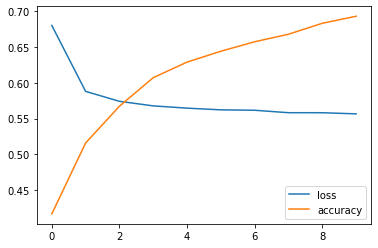

In [8]:
plt.plot(result.history['loss'])
plt.plot(result.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

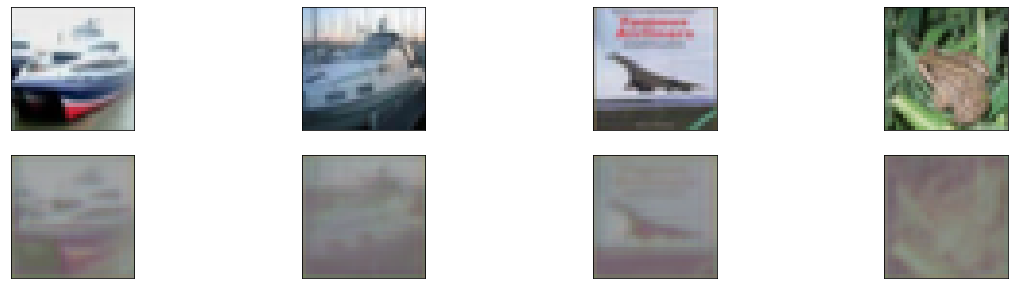

In [10]:
img = autoencoder.predict(X_test)
plt.figure(figsize=(20, 5))
for i in range(1,5):
    # befor
    ax = plt.subplot(2, 4, i)
    plt.imshow(X_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # after
    ax = plt.subplot(2, 4, i + 4)
    plt.imshow(img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2

### 2.1

In [11]:
cnn = tfk.Sequential()
cnn.add(tfkl.Conv2D(64,kernel_size=(3,3),strides=1,input_shape=(32,32,3),padding='valid',activation='relu'))
cnn.add(tfkl.MaxPool2D(pool_size=(2,2)))
cnn.add(tfkl.Dropout(0.3))
cnn.add(tfkl.Conv2D(32,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
cnn.add(tfkl.MaxPool2D(pool_size=(2,2)))
cnn.add(tfkl.Dropout(0.3))
cnn.add(tfkl.Flatten())
cnn.add(tfkl.Dense(64,activation='relu'))
cnn.add(tfkl.Dropout(0.5))
cnn.add(tfkl.Dense(10,activation='softmax'))

In [12]:
cnn.compile(optimizer = tfk.optimizers.RMSprop(), loss = tfk.losses.CategoricalCrossentropy())

In [15]:
result = cnn.fit(X_train,to_categorical(y_train),steps_per_epoch=10,epochs=10,batch_size=10,validation_data=(X_test,to_categorical(y_test)))

Epoch 1/10
10/10 [==============================] - 2s 180ms/step - loss: 2.4067 - val_loss: 2.3029
Epoch 2/10
10/10 [==============================] - 2s 152ms/step - loss: 2.3284 - val_loss: 2.3000
Epoch 3/10
10/10 [==============================] - 2s 159ms/step - loss: 2.3124 - val_loss: 2.2993
Epoch 4/10
10/10 [==============================] - 2s 155ms/step - loss: 2.2997 - val_loss: 2.2973
Epoch 5/10
10/10 [==============================] - 2s 154ms/step - loss: 2.3302 - val_loss: 2.3015
Epoch 6/10
10/10 [==============================] - 2s 157ms/step - loss: 2.3070 - val_loss: 2.2960
Epoch 7/10
10/10 [==============================] - 2s 157ms/step - loss: 2.2745 - val_loss: 2.2912
Epoch 8/10
10/10 [==============================] - 2s 158ms/step - loss: 2.2795 - val_loss: 2.2829
Epoch 9/10
10/10 [==============================] - 2s 157ms/step - loss: 2.3052 - val_loss: 2.2898
Epoch 10/10
10/10 [==============================] - 2s 156ms/step - loss: 2.2858 - val_loss: 2.2705

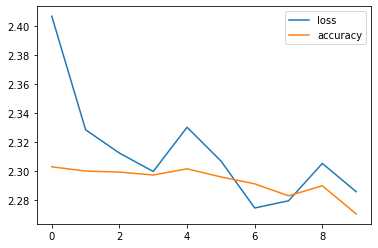

In [17]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(labels=['loss','accuracy'])

### 2.2

In [19]:
conv = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

cnn = tfk.Sequential()
cnn.add(conv)
cnn.add(tfkl.Flatten())
cnn.add(tfkl.Dense(64, activation='relu'))
cnn.add(tfkl.Dropout(0.5))
cnn.add(tfkl.Dense(10, activation='softmax'))

In [22]:
conv.trainable = False
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result = cnn.fit(X_train, to_categorical(y_train), epochs=5, batch_size=10,validation_data=(X_test,to_categorical(y_test)))

Epoch 1/5
5000/5000 [==============================] - 128s 26ms/step - loss: 1.6034 - accuracy: 0.4439 - val_loss: 1.3658 - val_accuracy: 0.5294
Epoch 2/5
5000/5000 [==============================] - 128s 26ms/step - loss: 1.5574 - accuracy: 0.4817 - val_loss: 1.4030 - val_accuracy: 0.5370
Epoch 3/5
5000/5000 [==============================] - 126s 25ms/step - loss: 1.6211 - accuracy: 0.4784 - val_loss: 1.4581 - val_accuracy: 0.5363
Epoch 4/5
5000/5000 [==============================] - 127s 25ms/step - loss: 1.6736 - accuracy: 0.4711 - val_loss: 1.5465 - val_accuracy: 0.5183
Epoch 5/5
5000/5000 [==============================] - 126s 25ms/step - loss: 1.7440 - accuracy: 0.4516 - val_loss: 1.6225 - val_accuracy: 0.5157


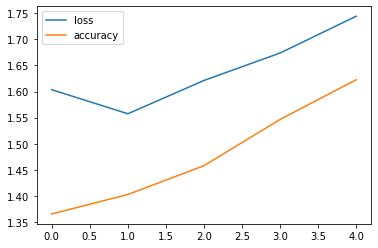

In [23]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(labels=['loss','accuracy'])

## 3

In [29]:
df=pd.read_csv('SPAM_detection.csv')
X = df['Message'].str.lower().values
y = df['category_val'].values

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [36]:
rnn = tfk.Sequential()
rnn.add(tfkl.Embedding(len(tokenizer.word_index)+1, 10, input_length=189))
rnn.add(tfkl.LSTM(128,return_sequences=True))
rnn.add(tfkl.GlobalMaxPool1D())
rnn.add(tfkl.Dropout(0.3))
rnn.add(tfkl.Dense(1,activation="sigmoid"))
rnn.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])

In [37]:
result = rnn.fit(X_train,y_train,epochs=10,steps_per_epoch=10,batch_size=16, validation_data=(X_test,y_test))

Epoch 1/10
10/10 [==============================] - 2s 241ms/step - loss: 0.6019 - accuracy: 0.7563 - val_loss: 0.3857 - val_accuracy: 0.8702
Epoch 2/10
10/10 [==============================] - 2s 204ms/step - loss: 0.4087 - accuracy: 0.8687 - val_loss: 0.3854 - val_accuracy: 0.8702
Epoch 3/10
10/10 [==============================] - 2s 206ms/step - loss: 0.4415 - accuracy: 0.8375 - val_loss: 0.3801 - val_accuracy: 0.8702
Epoch 4/10
10/10 [==============================] - 2s 204ms/step - loss: 0.4266 - accuracy: 0.8562 - val_loss: 0.3663 - val_accuracy: 0.8702
Epoch 5/10
10/10 [==============================] - 2s 207ms/step - loss: 0.2941 - accuracy: 0.9125 - val_loss: 0.3547 - val_accuracy: 0.8702
Epoch 6/10
10/10 [==============================] - 2s 205ms/step - loss: 0.4135 - accuracy: 0.8375 - val_loss: 0.3073 - val_accuracy: 0.8702
Epoch 7/10
10/10 [==============================] - 2s 210ms/step - loss: 0.3070 - accuracy: 0.8813 - val_loss: 0.2797 - val_accuracy: 0.8702
Epoch 

In [39]:
rnn_result = rnn.predict(X_test)

In [43]:
X_train = X_train[:,:,None]
X_test = X_test[:,:,None]

In [48]:
cnn = tfk.Sequential()
cnn.add(tfkl.Conv1D(filters= 64,kernel_size=2,strides=1,activation='relu',padding='same',input_shape=(X_train.shape[1],1)))
cnn.add(tfkl.MaxPooling1D(pool_size=2,padding='same'))
cnn.add(tfkl.Conv1D(filters = 64, kernel_size=2,strides=1,activation='relu',padding='same'))
cnn.add(tfkl.Dropout(0.3))
cnn.add(tfkl.Conv1D(32,kernel_size=2,strides=1,activation='relu',padding='same'))
cnn.add(tfkl.Flatten())
cnn.add(tfkl.Dense(16, activation='relu'))
cnn.add(tfkl.Dense(1, activation='sigmoid'))

In [49]:
cnn.compile(optimizer = tfk.optimizers.Adam(),loss = 'binary_crossentropy')
cnn.fit(X_train,y_train,epochs = 10,batch_size = 16,validation_data=(X_test,y_test))

Epoch 1/10
244/244 [==============================] - 1s 4ms/step - loss: 1.1061 - val_loss: 0.3227
Epoch 2/10
244/244 [==============================] - 1s 3ms/step - loss: 0.3305 - val_loss: 0.2884
Epoch 3/10
244/244 [==============================] - 1s 3ms/step - loss: 0.3171 - val_loss: 0.2859
Epoch 4/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2821 - val_loss: 0.2744
Epoch 5/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2718 - val_loss: 0.2537
Epoch 6/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2640 - val_loss: 0.2587
Epoch 7/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2686 - val_loss: 0.2505
Epoch 8/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2623 - val_loss: 0.2499
Epoch 9/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2591 - val_loss: 0.2506
Epoch 10/10
244/244 [==============================] - 1s 3ms/step - loss: 0.2576 - val_loss: 0.2405

In [50]:
cnn_result = cnn.predict(X_test)

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Rfpr, Rtpr, Ra = roc_curve(y_test, rnn_result)
Rauc = auc(fpr, tpr)

Cfpr, Ctpr, Ca = roc_curve(y_test, cnn_result)
Cauc = auc(fpr, tpr)

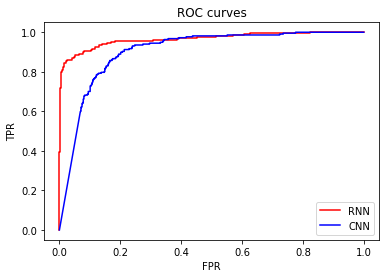

In [60]:
plt.title('ROC curves')
plt.plot(Rfpr, Rtpr, 'r', label = 'RNN'.format(Rauc))
plt.plot(Cfpr,Ctpr,'b',label='CNN'.format(Cauc))
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()